### Here, I have implemented various Classification algorithm with Python and Scikit-Learn.
### The objective is to predict whether a person makes over 50K a year.

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Import dataset

In [2]:
df = pd.read_csv(r'D:\7.30 PM DATA SCIENCE AND AI\DAILY SESSION MATERIALS\OCT\9th, 10th\project\adult.csv')

## 3. Exploratory Data Analysis

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

### 1. Rename column names

In [5]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### 2. View summary of dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 3. Explore categorical variables

In [8]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [9]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


### 4. Missing values in categorical variables

In [10]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

### 5. Frequency counts of categorical variables

In [11]:
for var in categorical:
    print(df[var].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

### 6. Frequency distribution of categorical variables

In [12]:
for var in categorical:
    print(df[var].value_counts()/float(len(df)))

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital_status, dtype: float64


## 1] Explore workclass variable

In [13]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [14]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [15]:
df['workclass'].replace('?', np.NaN, inplace=True)

In [16]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

## 2] Explore occupation variable

In [17]:
df['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [18]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [19]:
df['occupation'].replace('?', np.NaN, inplace=True)

In [20]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

## 3] Explore native_country variable

In [21]:
df['native_country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [22]:
df['native_country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [23]:
df['native_country'].replace('?', np.NaN, inplace=True)

In [24]:
df['native_country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

### Check missing values in categorical variables again

In [25]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Now, we can see that workclass, occupation and native_country variable contains missing values.

## 4] Explore Numerical Variables:

In [26]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [27]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40


In [28]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

## 4. Declare matrix of independent and dependent variable

In [29]:
X = df.drop('income', axis=1)
y = df['income']

## 5. Split the Dataset into Training and Test set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [31]:
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

## 6. Feature Engineering

In [32]:
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [33]:
categorical = [col for col in X_train.columns if X_train[col].dtypes=='O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [34]:
numerical = [col for col in X_train.columns if X_train[col].dtypes!='O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

### 1. Missing values in categorical variables

In [35]:
X_train[categorical].isnull().sum()

workclass         1294
education            0
marital_status       0
occupation        1300
relationship         0
race                 0
sex                  0
native_country     415
dtype: int64

In [36]:
X_train[categorical].isnull().mean()

workclass         0.056774
education         0.000000
marital_status    0.000000
occupation        0.057038
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018208
dtype: float64

In [37]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.056774306774306775
occupation 0.057037557037557036
native_country 0.018208143208143207


### 2. Impute missing categorical variables with most frequent value

In [38]:
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)

In [39]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [40]:
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [41]:
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [42]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

### 3. Encode categorical variables

In [43]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [44]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,State-gov,Bachelors,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
25206,Local-gov,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
23491,Private,Some-college,Never-married,Exec-managerial,Not-in-family,White,Female,United-States
12367,Local-gov,HS-grad,Never-married,Farming-fishing,Own-child,White,Male,United-States
7054,Federal-gov,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [45]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [46]:
import category_encoders as ce

In [47]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [48]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,40,1,0,0,0,0,0,0,0,31627,...,0,0,0,0,0,0,0,0,0,0
25206,39,0,1,0,0,0,0,0,0,236391,...,0,0,0,0,0,0,0,0,0,0
23491,42,0,0,1,0,0,0,0,0,194710,...,0,0,0,0,0,0,0,0,0,0
12367,27,0,1,0,0,0,0,0,0,273929,...,0,0,0,0,0,0,0,0,0,0
7054,38,0,0,0,1,0,0,0,0,99527,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X_train.shape

(22792, 105)

In [50]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,56,0,0,1,0,0,0,0,0,274475,...,0,0,0,0,0,0,0,0,0,0
8950,19,0,0,1,0,0,0,0,0,237455,...,0,0,0,0,0,0,0,0,0,0
7838,23,0,0,1,0,0,0,0,0,125491,...,0,0,0,0,0,0,0,0,0,0
16505,37,0,0,0,1,0,0,0,0,48779,...,0,0,0,0,0,0,0,0,0,0
19140,49,0,0,1,0,0,0,0,0,423222,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X_test.shape

(9769, 105)

## 7. Feature Scaling

In [52]:
cols = X_train.columns

In [53]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [54]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.15,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.229248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.10,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.483176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.134601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.50,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.797103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.05,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,-0.661406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,2.65,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.865395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22788,-0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.845541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22789,-0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.059197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22790,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.529306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
X_test = pd.DataFrame(X_test, columns=[cols])
X_test

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.801669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.492074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.444272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,-1.085808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.045628,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,0.00,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,-1.250766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9765,-0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.108233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9766,-0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.182036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9767,-0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.254141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 8. Implement Classification Models

### 1] Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

### 2] SVM

In [58]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train, y_train)

SVC()

In [59]:
y_pred_svc = svc.predict(X_test)
y_pred_svc

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

### 3] Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

### 4] Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

### 5] Gaussian Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [65]:
y_pred_gnb = gnb.predict(X_test)
y_pred_gnb

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype='<U5')

### 6] Bernoulli Naive Bayes

In [66]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(X_train, y_train)

BernoulliNB()

In [67]:
y_pred_bnb = bnb.predict(X_test)
y_pred_bnb

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype='<U5')

### 7] AdaBoost

In [68]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

ada.fit(X_train, y_train)

AdaBoostClassifier()

In [69]:
y_pred_ada = ada.predict(X_test)
y_pred_ada

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

### 8] Gradient Boost

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [71]:
y_pred_gbc = gbc.predict(X_test)
y_pred_gbc

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

## 9. Check Accuracy Score

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes', 'AdaBoost', 'Gradient Boost']
accuracies = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_svc), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_bnb), accuracy_score(y_test, y_pred_ada), accuracy_score(y_test, y_pred_gbc)]

data = {'Model Name':model_names, 'Accuracy Score':accuracies}

df = pd.DataFrame(data)
df

,Model Name,Accuracy Score
0,Logistic Regression,0.843484
1,SVM,0.803153
2,Decision Tree,0.813696
3,Random Forest,0.853107
4,Gaussian Naive Bayes,0.803050
5,Bernoulli Naive Bayes,0.792097
6,AdaBoost,0.860068
7,Gradient Boost,0.862115


In [74]:
df.sort_values('Accuracy Score',ascending=False).style.background_gradient(cmap='Greens', subset=['Accuracy Score'])

,Model Name,Accuracy Score
7,Gradient Boost,0.862115
6,AdaBoost,0.860068
3,Random Forest,0.853107
0,Logistic Regression,0.843484
2,Decision Tree,0.813696
1,SVM,0.803153
4,Gaussian Naive Bayes,0.803050
5,Bernoulli Naive Bayes,0.792097


## 10. Confusion matrix

### 1] Logistic Regression

In [75]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[6887,  523],
       [1006, 1353]], dtype=int64)

<Axes: >

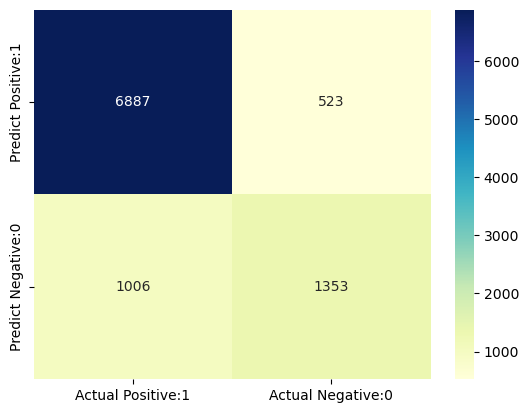

In [76]:
cm_mat_lr = pd.DataFrame(data=cm_lr, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_mat_lr, annot=True, fmt='d', cmap='YlGnBu')

### 2] SVM

In [77]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_svc

array([[7188,  222],
       [1701,  658]], dtype=int64)

<Axes: >

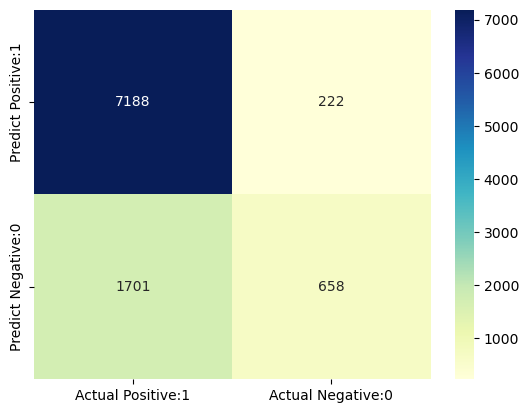

In [78]:
cm_mat_svc = pd.DataFrame(data=cm_svc, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_mat_svc, annot=True, fmt='d', cmap='YlGnBu')

### 3] Decision Tree

In [79]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt

array([[6500,  910],
       [ 910, 1449]], dtype=int64)

<Axes: >

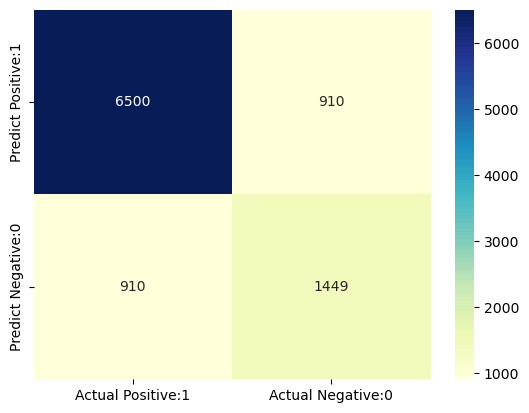

In [80]:
cm_mat_dt = pd.DataFrame(data=cm_dt, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_mat_dt, annot=True, fmt='d', cmap='YlGnBu')

### 4] Random Forest

In [81]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[6895,  515],
       [ 920, 1439]], dtype=int64)

<Axes: >

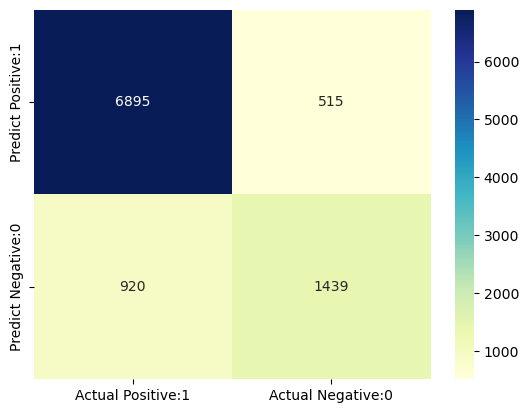

In [82]:
cm_mat_rf = pd.DataFrame(data=cm_rf, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_mat_rf, annot=True, fmt='d', cmap='YlGnBu')

### 5] Gaussian Naive Bayes

In [83]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[5953, 1457],
       [ 467, 1892]], dtype=int64)

<Axes: >

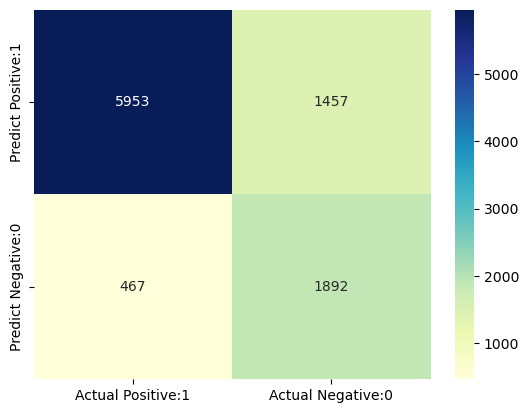

In [84]:
cm_mat_gnb = pd.DataFrame(data=cm_gnb, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_mat_gnb, annot=True, fmt='d', cmap='YlGnBu')

### 6] Bernoulli Naive Bayes

In [85]:
cm_bnb = confusion_matrix(y_test, y_pred_bnb)
cm_bnb

array([[5944, 1466],
       [ 565, 1794]], dtype=int64)

<Axes: >

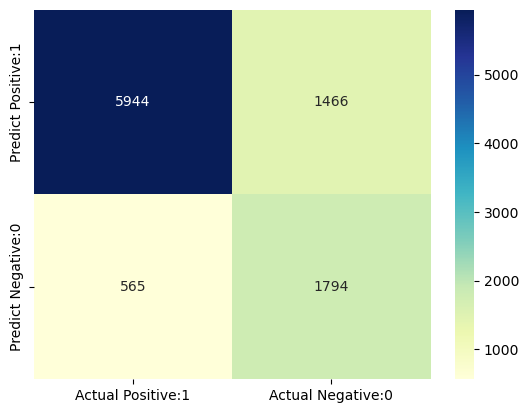

In [86]:
cm_mat_bnb = pd.DataFrame(data=cm_bnb, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_mat_bnb, annot=True, fmt='d', cmap='YlGnBu')

### 7] AdaBoost

In [87]:
cm_ada = confusion_matrix(y_test, y_pred_ada)
cm_ada

array([[6971,  439],
       [ 928, 1431]], dtype=int64)

<Axes: >

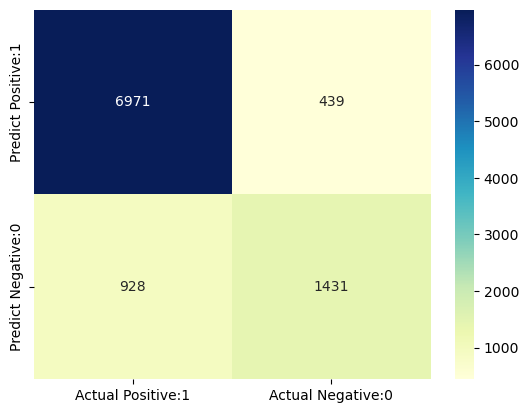

In [88]:
cm_mat_ada = pd.DataFrame(data=cm_ada, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_mat_ada, annot=True, fmt='d', cmap='YlGnBu')

### 8] Gradient Boost

In [89]:
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
cm_gbc

array([[7033,  377],
       [ 970, 1389]], dtype=int64)

<Axes: >

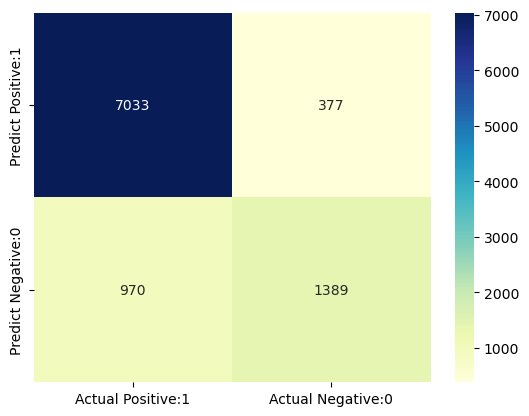

In [90]:
cm_mat_gbc = pd.DataFrame(data=cm_gbc, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_mat_gbc, annot=True, fmt='d', cmap='YlGnBu')

## 11. Classification Report

In [91]:
from sklearn.metrics import classification_report

### 1] Logistic Regression

In [92]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      7410
        >50K       0.72      0.57      0.64      2359

    accuracy                           0.84      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.84      0.84      9769



### 2] SVM

In [93]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      7410
        >50K       0.75      0.28      0.41      2359

    accuracy                           0.80      9769
   macro avg       0.78      0.62      0.64      9769
weighted avg       0.79      0.80      0.77      9769



### 3] Decision Tree

In [94]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      7410
        >50K       0.61      0.61      0.61      2359

    accuracy                           0.81      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.81      0.81      0.81      9769



### 4] Random Forest

In [95]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7410
        >50K       0.74      0.61      0.67      2359

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



### 5] Gaussian Naive Bayes

In [96]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      7410
        >50K       0.56      0.80      0.66      2359

    accuracy                           0.80      9769
   macro avg       0.75      0.80      0.76      9769
weighted avg       0.84      0.80      0.81      9769



### 6] Bernoulli Naive Bayes

In [97]:
print(classification_report(y_test, y_pred_bnb))

              precision    recall  f1-score   support

       <=50K       0.91      0.80      0.85      7410
        >50K       0.55      0.76      0.64      2359

    accuracy                           0.79      9769
   macro avg       0.73      0.78      0.75      9769
weighted avg       0.83      0.79      0.80      9769



### 7] AdaBoost

In [98]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7410
        >50K       0.77      0.61      0.68      2359

    accuracy                           0.86      9769
   macro avg       0.82      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



### 8] Gradient Boost

In [99]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7410
        >50K       0.79      0.59      0.67      2359

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.86      0.86      0.85      9769

